In [ ]:
# https://drive.google.com/file/d/1tdvHU6hzWF0v4l7s3n70Xb3bwBebCCtO/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/US_honey_dataset (1).csv') #download file from link, upload to colab, paste path

In [4]:
df.head(10)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995
5,5,Florida,230000,86,19780000,1780000,63.0,12461000,1995
6,6,Georgia,70000,62,4340000,260000,69.0,2995000,1995
7,7,Hawaii,8000,129,1032000,103000,55.0,568000,1995
8,8,Idaho,125000,48,6000000,1020000,65.0,3900000,1995
9,9,Illinois,11000,74,814000,212000,102.0,830000,1995


colonies - of bees per state

yield - number of bees per colony

stock - of honey per state

avg_price - average price per year per state

value_of_prod-money to product per year

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


since out of 1115, all 1115 are non null, there are no null values

In [7]:
df.describe()

,Unnamed: 0,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.00000,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,557.00000,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,322.01708,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,0.00000,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,278.50000,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,557.00000,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,835.50000,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,1114.00000,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


#Problem statement:
The dataset contains information on US Honey Consumption, inlcuding the average price of honey. We aim to explore and analyse this data to identify the trends and patterns in average honey price and gain insights

In [8]:
df.drop("Unnamed: 0", axis=1, inplace=True) #1 means columns, inplace is for permanent changes

In [9]:
df

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [10]:
df.isnull().sum() #confirming if all columns are non null,by getting sum of null values in each row

,0
state,0
colonies_number,0
yield_per_colony,0
production,0
stocks,0
average_price,0
value_of_production,0
year,0


In [11]:
df.isnull().sum().sum() #sum of all columns' null values

np.int64(0)

In [ ]:
# if we had null values - df.dropna(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# if duplicates were there - df.drop_duplicates()(inplace=True)

1)Identifying Which states are rarely contributing for honey production for the last 27 years

In [15]:
cont=df.groupby(["state"])["production"].sum().reset_index() #getting grouped by state. then sum of production for each state. reset index resets the index for our new dataframe. column names should be given in square brackets.

In [16]:
cont

,state,production
0,Alabama,14467000
1,Arizona,38844000
2,Arkansas,51846000
3,California,423876000
4,Colorado,32660000
5,Florida,280934000
6,Georgia,57426000
7,Hawaii,15420000
8,Idaho,87188000
9,Illinois,9864000


In [19]:
RarCont=cont.sort_values(by='production',ascending=True).head() #head gives top 5 rows
RarCont

,state,production
16,Maryland,1975000
30,Oklahoma,2055000
33,SouthCarolina,2823000
13,Kentucky,3224000
15,Maine,4762000


 Printing a bar plot for RarCont

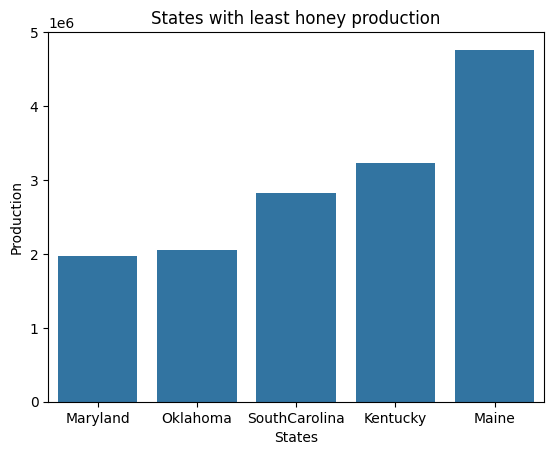

In [21]:

sns.barplot(data=RarCont, x='state', y='production')
plt.xlabel("States")
plt.ylabel("Production")
plt.title("States with least honey production")
plt.show()

#**2) Which are the top 5 Honey producing states in the US?**

In [24]:
topCont=df.groupby(["state"])["production"].sum().reset_index()
topCont

,state,production
0,Alabama,14467000
1,Arizona,38844000
2,Arkansas,51846000
3,California,423876000
4,Colorado,32660000
5,Florida,280934000
6,Georgia,57426000
7,Hawaii,15420000
8,Idaho,87188000
9,Illinois,9864000


In [26]:
topS=topCont.sort_values(by="production", ascending=True).tail() #or just ascneding =False
topS

,state,production
21,Montana,197173000
5,Florida,280934000
34,SouthDakota,355726000
3,California,423876000
28,NorthDakota,513742000


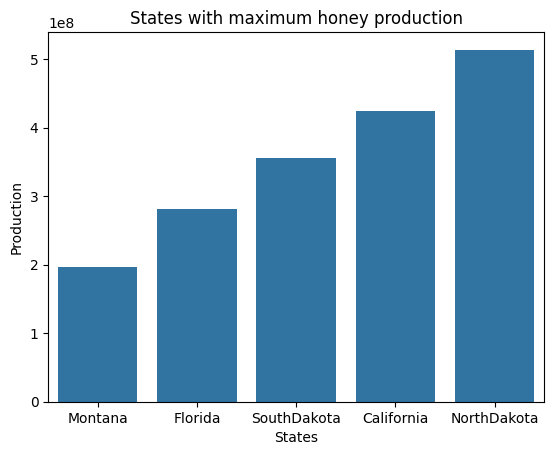

In [27]:
sns.barplot(data=topS, x='state', y='production')
plt.xlabel("States")
plt.ylabel("Production")
plt.title("States with maximum honey production")
plt.show()

# 3) **What  is the Change in mean Average price of Honey from 1995 to 2021?**

In [30]:
mean_avg= df.groupby(['year'])['average_price'].mean()
mean_avg

,average_price
year,
1995,74.840909
1996,99.568182
1997,91.325581
1998,83.720930
1999,80.325581
2000,79.023256
2001,88.465116
2002,133.204545
2003,151.068182


In [31]:
change_mean=mean_avg.loc[1995]-mean_avg.loc[2021] #change means difference b/w avg price of the 2 years
change_mean

np.float64(71.5066590909091)


# **4) Which was the year when production of Honey in whole US was the highest?**

In [34]:
hp=df.groupby(['year'])['production'].sum().reset_index()
hp

,year,production
0,1995,210272000
1,1996,197995000
2,1997,191176000
3,1998,219321000
4,1999,204585000
5,2000,220320000
6,2001,185403000
7,2002,170732000
8,2003,180741000
9,2004,182379000


In [36]:
hsp=hp.sort_values(by='production', ascending=False)
hsp.head(1)

,year,production
5,2000,220320000


#**5.From the above inference we get the production was highest in the year 2000, now checking which state was having highest contribution in that year**

In [39]:
hps=df.groupby(['state','year'])['production'].sum().reset_index()
hps

,state,year,production
0,Alabama,1995,928000
1,Alabama,1996,1024000
2,Alabama,1997,924000
3,Alabama,1998,1136000
4,Alabama,1999,1156000
...,...,...,...
1110,Wyoming,2017,186000
1111,Wyoming,2018,175000
1112,Wyoming,2019,306000
1113,Wyoming,2020,608000


In [43]:
statesfor2000=hps.loc[hps['year']==2000]
statesfor2000

,state,year,production
5,Alabama,2000,1248000
32,Arizona,2000,2360000
59,Arkansas,2000,5115000
86,California,2000,30800000
113,Colorado,2000,1740000
140,Florida,2000,24360000
167,Georgia,2000,3135000
194,Hawaii,2000,784000
221,Idaho,2000,4700000
248,Illinois,2000,488000


In [44]:
statesfor2000.sort_values(by='production',ascending=False).head(1)

,state,year,production
721,NorthDakota,2000,33350000


# **6.Which states have the highest no.of colonies in the year 2000?**